In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# load data
df = pd.read_parquet('2_after_feature_extraction/feature_matrix_media_calc.parquet')

In [3]:
# keep only css features
df_fp = df.drop(columns=['session_id'])
df_fp = df_fp[df_fp.columns[df_fp.columns.str.contains('css:')]]

# remove user agent from the mix
# df_fp = df_fp[df_fp.columns[~df_fp.columns.str.contains('User-Agent')]]

In [4]:
# Convert each row to tuple so we can count duplicates
fingerprint_hashes = df_fp.apply(lambda row: tuple(row), axis=1)

In [5]:
# Count unique vs duplicates
total = len(fingerprint_hashes)
unique = fingerprint_hashes.nunique()
duplicates = total - unique
collision_rate = duplicates / total

In [6]:
print(f"All features:")
print(f"- Total fingerprints: {total}")
print(f"- Unique fingerprints: {unique}")
print(f"- Collision rate: {collision_rate:.4f} ({duplicates} collisions)")

All features:
- Total fingerprints: 922
- Unique fingerprints: 593
- Collision rate: 0.3568 (329 collisions)


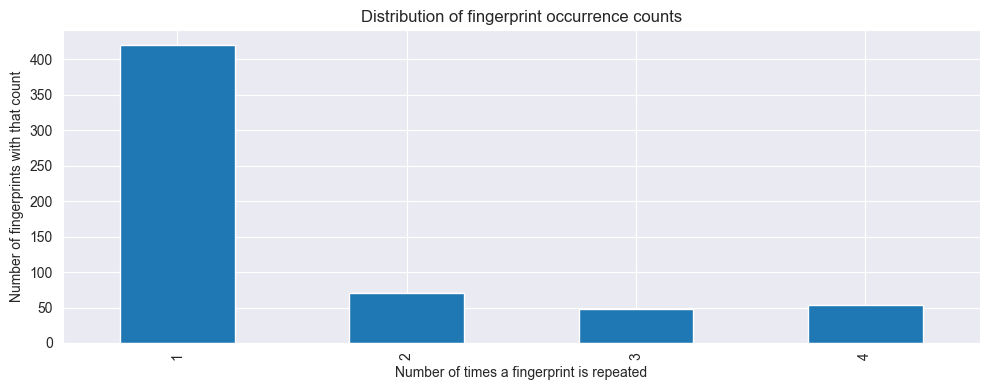

In [7]:
fp_counts = fingerprint_hashes.value_counts()
plt.figure(figsize=(10, 4))
fp_counts.value_counts().sort_index().plot(kind='bar')
plt.title("Distribution of fingerprint occurrence counts")
plt.xlabel("Number of times a fingerprint is repeated")
plt.ylabel("Number of fingerprints with that count")
plt.tight_layout()
plt.show()

In [8]:
# check which session_ids have the same fingerprint
df['fingerprint'] = fingerprint_hashes

duplicate_groups = df.groupby('fingerprint')['session_id'].apply(list)

duplicate_groups = duplicate_groups[duplicate_groups.apply(len) > 1]

print(f"Found {len(duplicate_groups)} duplicate fingerprints:")
for i, (fp, sessions) in enumerate(duplicate_groups.items(), 1):
    print(f"\nDuplicate Group {i}:")
    print(f"- Fingerprint: {fp}")
    print(f"- Session IDs: {sessions}")

Found 173 duplicate fingerprints:

Duplicate Group 1:
- Fingerprint: ('Mozilla/5.0 (Linux; Android 10; K) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/133.0.0.0 Mobile Safari/537.36', 5.602941, 7.953125, 274.924133, 6.496094, 0.370536, 938.622253, 19.651787, 59.558338, 0.327381, 129, 224, 167, 787, 164, 1100, 121, 6866, 125, 90, 130, 78, 162, 454, 105, 150, 100, 344, 162, 170, 50, 488, 65, 600, 113, 673, '0', 1, 32, 7, 17, 128, 32, 68, 36, 3, 8, 5, '3', 7, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, '000000000001000')
- Session IDs: ['54f9b1a0-92d2-4045-9149-12c71e1d58d4', '57cedee0-bc1e-45bc-90c7-233a93427f48']

Duplicate Group 2:
- Fingerprint: ('Mozilla/5.0 (Linux; Android 10; K) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/135.0.0.0 Mobile Safari/537.36', 5.602941, 7.953125, 274.921875, 6.496094, 0.370536, 938.622253, 19.651787, 59.558338, 0.327381, 130, 224, 169, 785, 167, 1100, 121, 6866, 126, 92, 131, 76, 163, 454, 105, 150, 100, 376, 163, 169, 51, 487, 66, 600, 115, 671, 